Learned Weights W1:
 [[ 0.08058127 -0.03833083 -0.00339134]
 [ 0.09388313  0.06194867  0.10154739]
 [-0.03250421  0.17110116  0.2392853 ]]
Learned Biases b1:
 [[-0.06327833]
 [ 0.08814433]
 [ 0.27258523]]
Learned Weights W2:
 [[ 0.08977927 -0.09877187 -0.36391899]]
Learned Biases b2:
 [[-0.85820035]]

Predictions (Real Scale):
 [[20.08292911 18.59853352 26.56983603 24.75448821 25.63510833]]


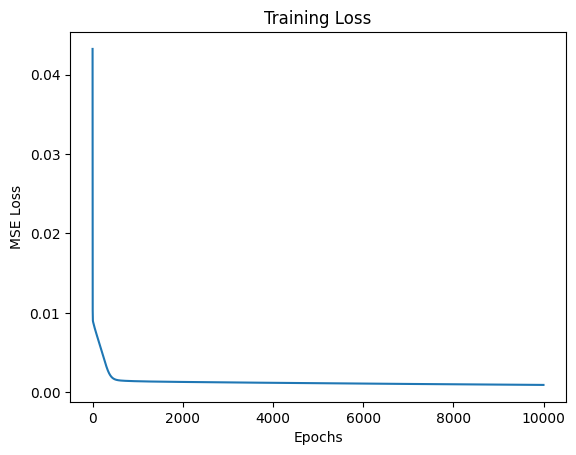

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset
X = np.array([
    [20, 3, 4],
    [15, 5, 3],
    [30, 2, 2],
    [25, 4, 1],
    [35, 2, 3]
])

# Output: Total Revenue (Normalized / 100)
Y_raw = np.array([[18], [20], [22], [25], [30]])
Y = Y_raw / 100.0

class SimpleNN:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.lr = learning_rate
        np.random.seed(42)
        self.W1 = np.random.randn(hidden_size, input_size) * 0.1
        self.b1 = np.zeros((hidden_size, 1))
        self.W2 = np.random.randn(output_size, hidden_size) * 0.1
        self.b2 = np.zeros((output_size, 1))

    def relu(self, z):
        return np.maximum(0, z)

    def relu_deriv(self, z):
        return (z > 0).astype(float)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def forward(self, x):
        self.Z1 = np.dot(self.W1, x) + self.b1
        self.A1 = self.relu(self.Z1)
        self.Z2 = np.dot(self.W2, self.A1) + self.b2
        self.A2 = self.sigmoid(self.Z2)
        return self.A2

    def train(self, X, Y, epochs=10000):
        loss_history = []
        m = X.shape[0] # number of examples (5)

        for i in range(epochs):
            # Transpose inputs to match matrix multiplication rules
            # X_T shape becomes (3, 5)
            X_T = X.T
            Y_T = Y.T

            # --- Forward ---
            Z1 = np.dot(self.W1, X_T) + self.b1
            A1 = self.relu(Z1)
            Z2 = np.dot(self.W2, A1) + self.b2
            A2 = self.sigmoid(Z2)

            # Loss (MSE)
            loss = np.mean((A2 - Y_T)**2)
            loss_history.append(loss)

            # --- Backward ---

            # Layer 2 Gradients
            # dZ2 shape: (1, 5)
            dZ2 = 2 * (A2 - Y_T) * (A2 * (1 - A2))

            # dW2 shape: (1, 3) -> dZ2 dot A1.T
            dW2 = (1/m) * np.dot(dZ2, A1.T)
            db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

            # Layer 1 Gradients
            dA1 = np.dot(self.W2.T, dZ2)
            dZ1 = dA1 * self.relu_deriv(Z1) # shape (3, 5)

            dW1 = (1/m) * np.dot(dZ1, X)
            db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

            # Update weights
            self.W2 -= self.lr * dW2
            self.b2 -= self.lr * db2
            self.W1 -= self.lr * dW1
            self.b1 -= self.lr * db1

        return loss_history

# Initialize and Train
nn = SimpleNN(input_size=3, hidden_size=3, output_size=1, learning_rate=0.1)
history = nn.train(X, Y, epochs=10000)

print("Learned Weights W1:\n", nn.W1)
print("Learned Biases b1:\n", nn.b1)
print("Learned Weights W2:\n", nn.W2)
print("Learned Biases b2:\n", nn.b2)

# Predictions
preds = nn.forward(X.T)
print("\nPredictions (Real Scale):\n", preds * 100)

# Plot
plt.plot(history)
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()